In [1]:
#Author: David Petronio
#This notebook reads a financial history CSV file in order to perform calculations,display relevant data and visualizations
#import pandas, numpy, and matplotlib, use pandas to read a user-inputted CSV file
#Try/Except error checking prints if file name is invalid
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
try:
    csv_file = input("Please enter the CSV file name: ")
    fh = pd.read_csv(csv_file, index_col=0, parse_dates = True)
except:
    print("An error has occured, please make sure the filename and path are entered correctly.")

Please enter the CSV file name: goog.csv


In [2]:
fh

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-08,2277.959961,2284.004883,2257.679932,2265.439941,2265.439941,1358300
2021-04-09,2256.699951,2289.040039,2253.714111,2285.879883,2285.879883,1044400
2021-04-12,2266.250000,2275.320068,2238.465088,2254.790039,2254.790039,1565900
2021-04-13,2261.469971,2277.209961,2256.090088,2267.270020,2267.270020,1165500
2021-04-14,2275.159912,2277.989990,2249.189941,2254.840088,2254.840088,1011000
...,...,...,...,...,...,...
2022-04-04,2816.489990,2880.875000,2816.489990,2872.850098,2872.850098,953800
2022-04-05,2867.989990,2871.800049,2818.870117,2821.260010,2821.260010,962800
2022-04-06,2783.229980,2796.969971,2728.362061,2743.520020,2743.520020,1178700


In [8]:
#last five rows
fh.tail()

,Open,High,Low,Close,Adj Close,Volume,%chg
Date,,,,,,,
2022-04-04,2816.489990,2880.875000,2816.489990,2872.850098,2872.850098,953800,0.020913
2022-04-05,2867.989990,2871.800049,2818.870117,2821.260010,2821.260010,962800,-0.017958
2022-04-06,2783.229980,2796.969971,2728.362061,2743.520020,2743.520020,1178700,-0.027555
2022-04-07,2732.360107,2754.030029,2697.145020,2729.300049,2729.300049,971700,-0.005183
2022-04-08,2725.000000,2725.000000,2686.199951,2696.784912,2696.784912,458916,-0.011913


In [9]:
#new calculated attribute of DoD return
fh['Log returns'] = np.log(fh['Close']/fh['Close'].shift())

In [10]:
fh

,Open,High,Low,Close,Adj Close,Volume,%chg,Log returns
Date,,,,,,,,
2021-04-08,2277.959961,2284.004883,2257.679932,2265.439941,2265.439941,1358300,NaN,NaN
2021-04-09,2256.699951,2289.040039,2253.714111,2285.879883,2285.879883,1044400,0.009023,0.008982
2021-04-12,2266.250000,2275.320068,2238.465088,2254.790039,2254.790039,1565900,-0.013601,-0.013694
2021-04-13,2261.469971,2277.209961,2256.090088,2267.270020,2267.270020,1165500,0.005535,0.005520
2021-04-14,2275.159912,2277.989990,2249.189941,2254.840088,2254.840088,1011000,-0.005482,-0.005497
...,...,...,...,...,...,...,...,...
2022-04-04,2816.489990,2880.875000,2816.489990,2872.850098,2872.850098,953800,0.020913,0.020698
2022-04-05,2867.989990,2871.800049,2818.870117,2821.260010,2821.260010,962800,-0.017958,-0.018121
2022-04-06,2783.229980,2796.969971,2728.362061,2743.520020,2743.520020,1178700,-0.027555,-0.027942


In [12]:
#returns standard deviation
fh['Log returns'].std()

0.01563953295515075

In [14]:
#retruns volatility
AnnualSD  = fh['Log returns'].std()*252**.5
AnnualSD

0.24826988892316784

In [16]:
#volatility as percentage
Str_AnnualSD = str(round(AnnualSD, 4)*100)
Str_AnnualSD

'24.83'

<IPython.core.display.Javascript object>


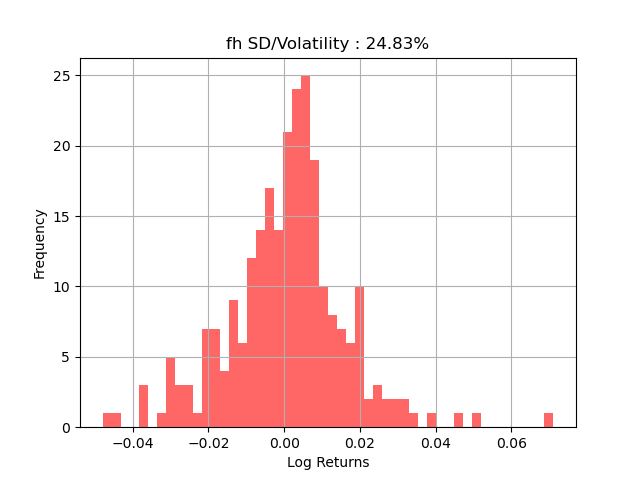

In [17]:
#visualizing volatility percentage
fig, ax1 = plt.subplots()
fh['Log returns'].hist(ax=ax1, bins = 50, alpha = 0.6, color = 'r')
ax1.set_xlabel("Log Returns")
ax1.set_ylabel("Frequency")
ax1.set_title("fh SD/Volatility : " + Str_AnnualSD + "%")
plt.rcParams['figure.figsize'] = [20,12]

In [20]:
#rolling average of last 10 computed for last five entries
fh['Close'].rolling(10).mean().tail()

Date
2022-04-04    2826.902002
2022-04-05    2828.472998
2022-04-06    2825.817993
2022-04-07    2816.123999
2022-04-08    2802.759497
Name: Close, dtype: float64

In [21]:
#rolling average of last 10 as new calculated attribute
fh['MA10']= fh['Close'].rolling(10).mean()

In [22]:
fh.tail()

,Open,High,Low,Close,Adj Close,Volume,%chg,Log returns,MA10
Date,,,,,,,,,
2022-04-04,2816.489990,2880.875000,2816.489990,2872.850098,2872.850098,953800,0.020913,0.020698,2826.902002
2022-04-05,2867.989990,2871.800049,2818.870117,2821.260010,2821.260010,962800,-0.017958,-0.018121,2828.472998
2022-04-06,2783.229980,2796.969971,2728.362061,2743.520020,2743.520020,1178700,-0.027555,-0.027942,2825.817993
2022-04-07,2732.360107,2754.030029,2697.145020,2729.300049,2729.300049,971700,-0.005183,-0.005197,2816.123999
2022-04-08,2725.000000,2725.000000,2686.199951,2696.784912,2696.784912,458916,-0.011913,-0.011985,2802.759497


In [23]:
#new calculated attribute exponentially weighted moving average of last 10
fh['EMA10']= fh['Close'].ewm(span=10,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

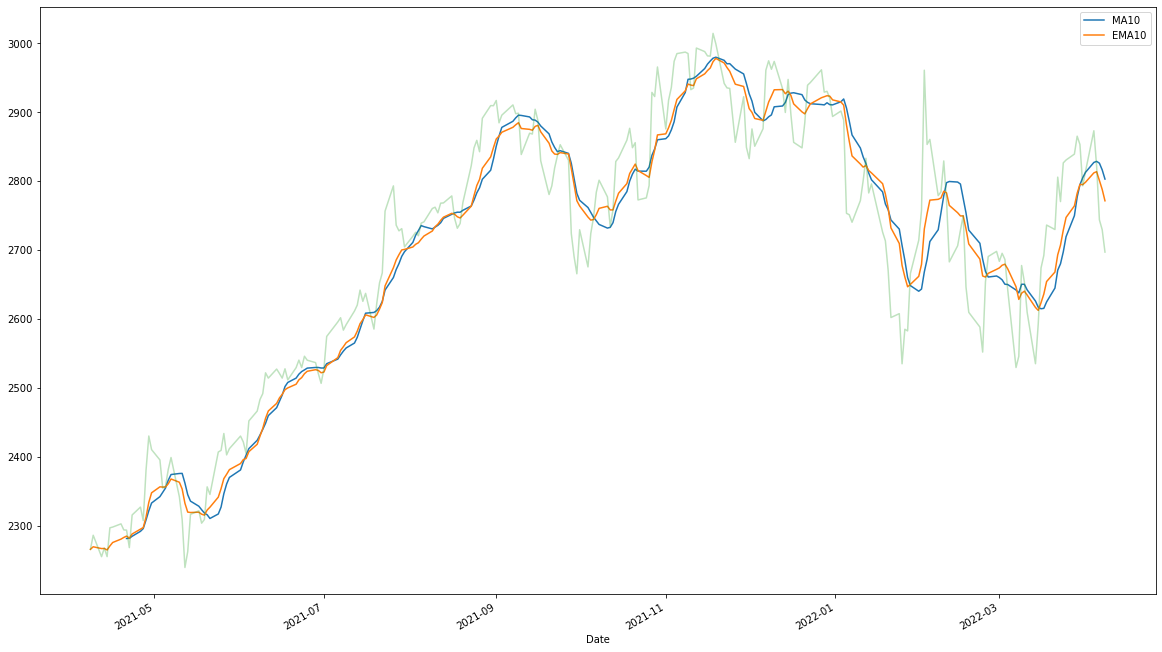

In [24]:
#visualizing exponentially weighted moving average, moving average, closing values
fig, ax1 = plt.subplots()
fh[['MA10','EMA10']].loc['2021-03-01':].plot(ax=ax1)
fh['Close'].loc['2021-03-01':].plot(ax=ax1, alpha = 0.3)

In [25]:
#Moving average convergence divergence - momentum indication
exp1 = fh['Close'].ewm(span=12,adjust=False).mean()
exp2 = fh['Close'].ewm(span=26,adjust=False).mean()
fh['MACD'] = exp1 - exp2
fh['Signal Line']= fh['MACD'].ewm(span=9,adjust=False).mean()

In [26]:
fh.tail()

,Open,High,Low,Close,Adj Close,Volume,%chg,Log returns,MA10,EMA10,MACD,Signal Line
Date,,,,,,,,,,,,
2022-04-04,2816.489990,2880.875000,2816.489990,2872.850098,2872.850098,953800,0.020913,0.020698,2826.902002,2811.770609,45.432479,31.975891
2022-04-05,2867.989990,2871.800049,2818.870117,2821.260010,2821.260010,962800,-0.017958,-0.018121,2828.472998,2813.495954,43.659301,34.312573
2022-04-06,2783.229980,2796.969971,2728.362061,2743.520020,2743.520020,1178700,-0.027555,-0.027942,2825.817993,2800.773057,35.571036,34.564266
2022-04-07,2732.360107,2754.030029,2697.145020,2729.300049,2729.300049,971700,-0.005183,-0.005197,2816.123999,2787.777965,27.694351,33.190283
2022-04-08,2725.000000,2725.000000,2686.199951,2696.784912,2696.784912,458916,-0.011913,-0.011985,2802.759497,2771.233773,18.613755,30.274977


<AxesSubplot:>

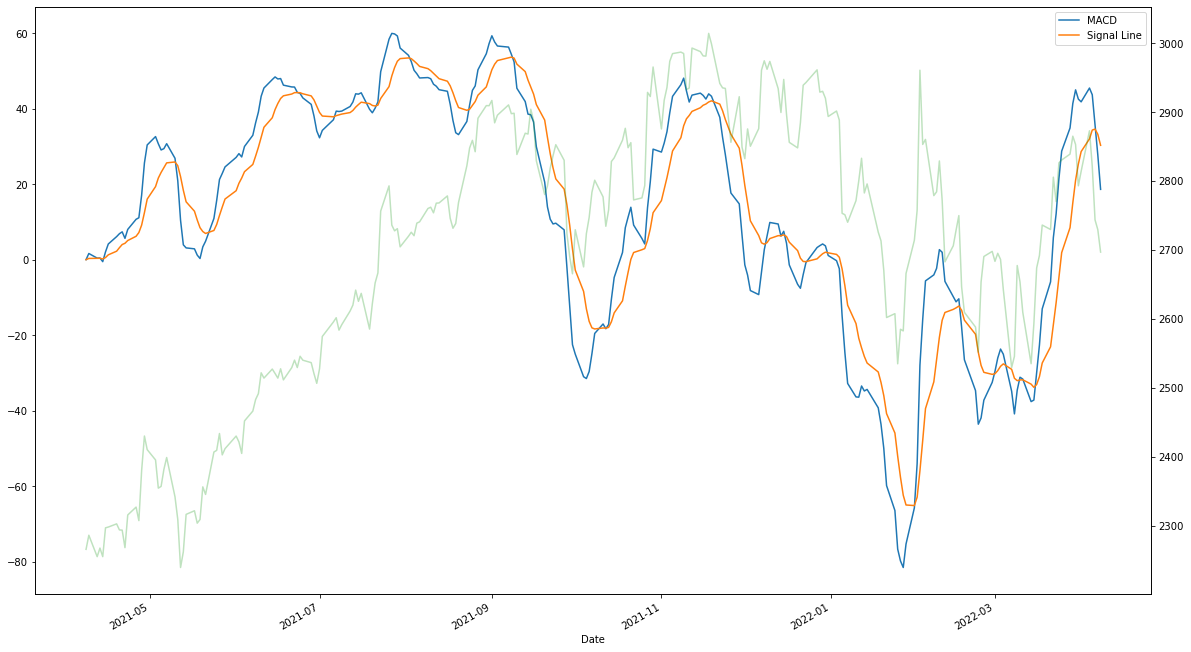

In [27]:
#when macd crosses signal line: bullish
fig, ax1 = plt.subplots()
fh[['MACD','Signal Line']].loc['2021-01-01':].plot(ax=ax1)
fh['Close'].loc['2021-01-01':].plot(ax=ax1, alpha = 0.3, secondary_y= True)